In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
import gc

%matplotlib inline

In [2]:
import statsmodels

In [3]:
df = pd.read_csv('FAO.csv', encoding = 'mbcs' ) 

In [4]:
df.head(100)

,Area Abbreviation,Area Code,Area,Item Code,Item,Element Code,Element,Unit,latitude,longitude,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,AFG,2,Afghanistan,2511,Wheat and products,5142,Food,1000 tonnes,33.94,67.71,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,AFG,2,Afghanistan,2805,Rice (Milled Equivalent),5142,Food,1000 tonnes,33.94,67.71,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,AFG,2,Afghanistan,2513,Barley and products,5521,Feed,1000 tonnes,33.94,67.71,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,AFG,2,Afghanistan,2513,Barley and products,5142,Food,1000 tonnes,33.94,67.71,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,AFG,2,Afghanistan,2514,Maize and products,5521,Feed,1000 tonnes,33.94,67.71,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200
5,AFG,2,Afghanistan,2514,Maize and products,5142,Food,1000 tonnes,33.94,67.71,...,231.0,67.0,82.0,67.0,69.0,71.0,82.0,73.0,77,76
6,AFG,2,Afghanistan,2517,Millet and products,5142,Food,1000 tonnes,33.94,67.71,...,15.0,21.0,11.0,19.0,21.0,18.0,14.0,14.0,14,12
7,AFG,2,Afghanistan,2520,"Cereals, Other",5142,Food,1000 tonnes,33.94,67.71,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0,0
8,AFG,2,Afghanistan,2531,Potatoes and products,5142,Food,1000 tonnes,33.94,67.71,...,276.0,294.0,294.0,260.0,242.0,250.0,192.0,169.0,196,230
9,AFG,2,Afghanistan,2536,Sugar cane,5521,Feed,1000 tonnes,33.94,67.71,...,50.0,29.0,61.0,65.0,54.0,114.0,83.0,83.0,69,81


In [5]:
df1 = df.loc[:, ~(df.columns).isin(['Area Abbreviation','Area Code', 'Item Code', 'Element Code', 'Unit'])]

In [6]:
Aggr_sum = df1.groupby(['Area', 'Item', 'Element']).agg(sum).reset_index()
print(Aggr_sum)

              Area                             Item Element  latitude  \
0      Afghanistan              Alcoholic Beverages    Food     33.94   
1      Afghanistan                      Animal fats    Food     33.94   
2      Afghanistan              Apples and products    Food     33.94   
3      Afghanistan                          Bananas    Food     33.94   
4      Afghanistan              Barley and products    Feed     33.94   
5      Afghanistan              Barley and products    Food     33.94   
6      Afghanistan                             Beer    Food     33.94   
7      Afghanistan             Beverages, Alcoholic    Food     33.94   
8      Afghanistan                      Bovine Meat    Food     33.94   
9      Afghanistan                     Butter, Ghee    Food     33.94   
10     Afghanistan         Cereals - Excluding Beer    Feed     33.94   
11     Afghanistan         Cereals - Excluding Beer    Food     33.94   
12     Afghanistan                   Cereals, Other

In [7]:
Aggr_sum=Aggr_sum.fillna(0)

In [8]:
Aggr_sum_no_att = Aggr_sum.loc[:, ~(Aggr_sum.columns).isin(['latitude', 'longitude'])]

In [9]:
Aggr_sum_no_att.shape

(21018, 56)

In [10]:
no_att_by_country = Aggr_sum_no_att.groupby(['Area', 'Element']).agg(sum).reset_index()
print(no_att_by_country)

                                   Area Element     Y1961     Y1962     Y1963  \
0                           Afghanistan    Feed     720.0     720.0     736.0   
1                           Afghanistan    Food    8761.0    8694.0    8458.0   
2                               Albania    Feed      94.0     108.0     124.0   
3                               Albania    Food    1612.0    1641.0    1643.0   
4                               Algeria    Feed      83.0      94.0      63.0   
5                               Algeria    Food    7405.0    7141.0    6798.0   
6                                Angola    Feed     118.0     118.0     116.0   
7                                Angola    Food    4716.0    4657.0    5124.0   
8                   Antigua and Barbuda    Feed       2.0       2.0       2.0   
9                   Antigua and Barbuda    Food      90.0      92.0     103.0   
10                            Argentina    Feed    9552.0    7553.0    6527.0   
11                          

In [11]:
by_country = no_att_by_country.groupby(['Area']).agg(sum).reset_index()

In [12]:
df_all = Aggr_sum_no_att

In [13]:
data = by_country

In [14]:
data['total'] = (data['Y1961'] + data['Y1962'] + data['Y1963'] + data['Y1964'] + data['Y1965'] + data['Y1966'] + 
    data['Y1967'] + data['Y1968'] + data['Y1969'] + data['Y1970'] + data['Y1971'] + data['Y1972'] + data['Y1973'] +
    data['Y1974'] + data['Y1975'] + data['Y1976'] + data['Y1977'] + data['Y1978'] + data['Y1979'] + data['Y1980'] + 
    data['Y1981'] + data['Y1982'] + data['Y1983'] + data['Y1984'] + data['Y1985'] + data['Y1986'] + data['Y1987'] + 
    data['Y1988'] + data['Y1989'] + data['Y1990'] + data['Y1991'] + data['Y1992'] + data['Y1993'] + data['Y1994'] + 
    data['Y1995'] + data['Y1996'] + data['Y1997'] + data['Y1998'] + data['Y1999'] + data['Y2000'] + 
    data['Y2001'] + data['Y2002'] + data['Y2003'] + data['Y2004'] + data['Y2005'] + data['Y2006'] + data['Y2007'] + 
    data['Y2008'] + data['Y2009'] + data['Y2010'] + data['Y2011'] + data['Y2012'] + data['Y2013'] )

In [15]:
data.head()

,Area,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,total
0,Afghanistan,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,...,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706,23007,689162.0
1,Albania,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,...,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221,8271,237202.0
2,Algeria,7488.0,7235.0,6861.0,7255.0,7509.0,7536.0,7986.0,8839.0,9003.0,...,49562.0,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365,72161,1530613.0
3,Angola,4834.0,4775.0,5240.0,5286.0,5527.0,5677.0,5833.0,5685.0,6219.0,...,26696.0,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064,48639,706016.0
4,Antigua and Barbuda,92.0,94.0,105.0,95.0,84.0,73.0,64.0,59.0,68.0,...,115.0,110.0,122.0,115.0,114.0,115.0,118.0,113,119,4446.0


In [16]:
now = no_att_by_country

In [17]:
now

,Area,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,Feed,720.0,720.0,736.0,740.0,720.0,724.0,788.0,826.0,...,704.0,1184.0,1342.0,1392.0,1294.0,1616.0,1388.0,1192.0,1522,1536
1,Afghanistan,Food,8761.0,8694.0,8458.0,9430.0,9753.0,9445.0,10501.0,10682.0,...,15838.0,16474.0,16975.0,17856.0,18087.0,19045.0,19642.0,19908.0,21184,21471
2,Albania,Feed,94.0,108.0,124.0,122.0,95.0,197.0,202.0,229.0,...,990.0,994.0,1047.0,959.0,1075.0,1134.0,1334.0,1334.0,1312,1319
3,Albania,Food,1612.0,1641.0,1643.0,1767.0,1789.0,1798.0,1844.0,1940.0,...,5647.0,5725.0,5864.0,5785.0,6093.0,6182.0,6573.0,6780.0,6909,6952
4,Algeria,Feed,83.0,94.0,63.0,98.0,84.0,55.0,74.0,130.0,...,4575.0,4401.0,4599.0,4252.0,3436.0,4839.0,5804.0,7477.0,8549,8706
5,Algeria,Food,7405.0,7141.0,6798.0,7157.0,7425.0,7481.0,7912.0,8709.0,...,44044.0,45161.0,46468.0,45681.0,47480.0,52666.0,54267.0,58375.0,60816,63455
6,Angola,Feed,118.0,118.0,116.0,132.0,128.0,128.0,148.0,148.0,...,9622.0,9814.0,10004.0,10112.0,10274.0,12520.0,12408.0,13118.0,10096,18518
7,Angola,Food,4716.0,4657.0,5124.0,5154.0,5399.0,5549.0,5685.0,5537.0,...,15919.0,16882.0,18243.0,19765.0,21779.0,24465.0,25992.0,27455.0,27968,30121
8,Antigua and Barbuda,Feed,2.0,2.0,2.0,2.0,2.0,0.0,0.0,2.0,...,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0,0
9,Antigua and Barbuda,Food,90.0,92.0,103.0,93.0,82.0,73.0,64.0,57.0,...,92.0,113.0,108.0,122.0,115.0,114.0,115.0,118.0,113,119


In [18]:
now['total'] = (now['Y1961'] + now['Y1962'] + now['Y1963'] + now['Y1964'] + now['Y1965'] + now['Y1966'] + 
    now['Y1967'] + now['Y1968'] + now['Y1969'] + now['Y1970'] + now['Y1971'] + now['Y1972'] + now['Y1973'] +
    now['Y1974'] + now['Y1975'] + now['Y1976'] + now['Y1977'] + now['Y1978'] + now['Y1979'] + now['Y1980'] + 
    now['Y1981'] + now['Y1982'] + now['Y1983'] + now['Y1984'] + now['Y1985'] + now['Y1986'] + now['Y1987'] + 
    now['Y1988'] + now['Y1989'] + now['Y1990'] + now['Y1991'] + now['Y1992'] + now['Y1993'] + now['Y1994'] + 
    now['Y1995'] + now['Y1996'] + now['Y1997'] + now['Y1998'] + now['Y1999'] + now['Y2000'] + 
    now['Y2001'] + now['Y2002'] + now['Y2003'] + now['Y2004'] + now['Y2005'] + now['Y2006'] + now['Y2007'] + 
    now['Y2008'] + now['Y2009'] + now['Y2010'] + now['Y2011'] + now['Y2012'] + now['Y2013'])


c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


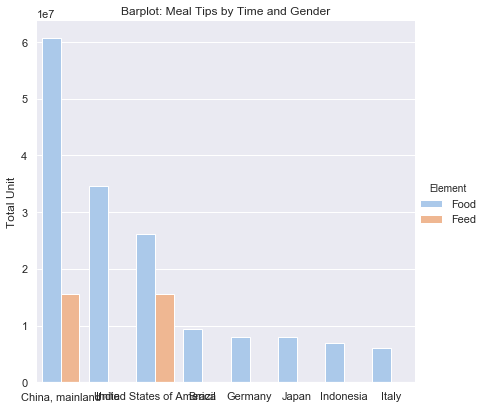

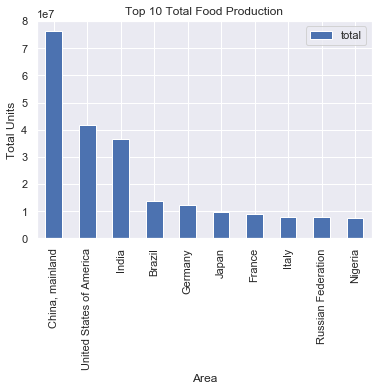

In [21]:
sorted_ = data.sort_values('total', ascending=False).head(10)
sorted_.plot('Area','total', kind = 'bar', title = 'Top 10 Total Food Production')
plt.ylabel('Total Units')
plt.show()

c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


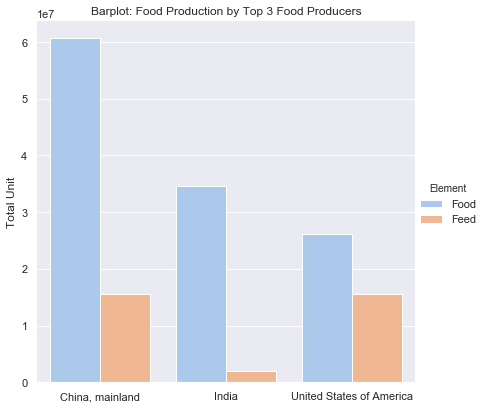

In [70]:
sorted_ = now.sort_values('total', ascending=False)
sns.set(style="darkgrid")

g = sns.factorplot(x="Area", y="total", hue = 'Element', data=sorted_[(sorted_['Area'] == "India") 
                               | (sorted_['Area'] == "China, mainland")
                               | (sorted_['Area'] == "United States of America")],
                   size=6, kind="bar", palette="pastel", ci=95)
g.despine(left=True)
g.set_ylabels("Total Unit")
g.set_xlabels("")
plt.title('Barplot: Food Production by Top 3 Food Producers')
plt.show()

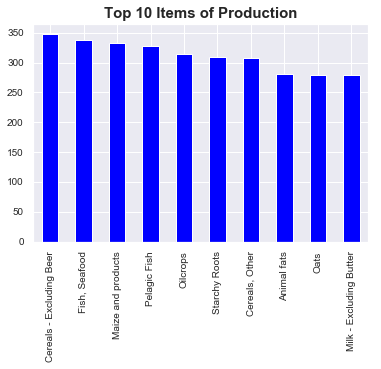

In [22]:
graph_by_items = df_all['Item'].value_counts()
fig, ax = plt.subplots()
ax.tick_params(axis = 'x', labelsize = 10)
ax.tick_params(axis = 'y', labelsize = 10)
ax.set_title('Top 10 Items of Production', fontsize = 15, fontweight = 'bold')
graph_by_items[:10].plot(ax=ax, kind='bar', color='blue')

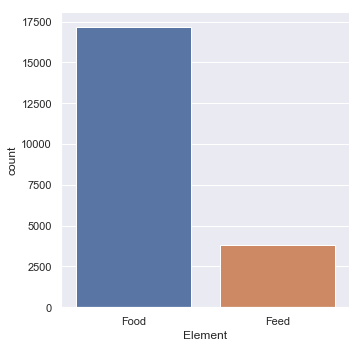

In [23]:
sns.catplot('Element', data = df_all, kind = 'count');

Modeling

In [24]:
from statsmodels.tsa.arima_model import ARIMA

In [25]:
data.head(10)

,Area,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,Y1968,Y1969,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,total
0,Afghanistan,9481.0,9414.0,9194.0,10170.0,10473.0,10169.0,11289.0,11508.0,11815.0,...,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706,23007,689162.0
1,Albania,1706.0,1749.0,1767.0,1889.0,1884.0,1995.0,2046.0,2169.0,2230.0,...,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221,8271,237202.0
2,Algeria,7488.0,7235.0,6861.0,7255.0,7509.0,7536.0,7986.0,8839.0,9003.0,...,49562.0,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365,72161,1530613.0
3,Angola,4834.0,4775.0,5240.0,5286.0,5527.0,5677.0,5833.0,5685.0,6219.0,...,26696.0,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064,48639,706016.0
4,Antigua and Barbuda,92.0,94.0,105.0,95.0,84.0,73.0,64.0,59.0,68.0,...,115.0,110.0,122.0,115.0,114.0,115.0,118.0,113,119,4446.0
5,Argentina,43402.0,40784.0,40219.0,41638.0,44936.0,46738.0,47437.0,50357.0,52029.0,...,72316.0,72146.0,74148.0,75939.0,68422.0,73042.0,78764.0,75946,80843,3280173.0
6,Armenia,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5992.0,6228.0,6753.0,6958.0,6824.0,5908.0,6423.0,6978,7175,117743.0
7,Australia,25795.0,27618.0,28902.0,29107.0,28961.0,30558.0,30443.0,31344.0,32747.0,...,63711.0,62564.0,62637.0,64438.0,59813.0,64926.0,61871.0,61955,62446,2274086.0
8,Austria,22542.0,22627.0,23637.0,24099.0,22664.0,23785.0,23949.0,25094.0,24044.0,...,24466.0,24030.0,24431.0,25267.0,24731.0,24518.0,25444.0,24071,24990,1275917.0
9,Azerbaijan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,14964.0,15739.0,16744.0,16963.0,17602.0,17674.0,18329.0,19196,20162,284996.0


In [26]:
data_Bulgaria = data[data['Area'] == 'Bulgaria']
print(data_Bulgaria)

        Area    Y1961    Y1962    Y1963    Y1964    Y1965    Y1966    Y1967  \
23  Bulgaria  15979.0  15990.0  17748.0  18812.0  18178.0  20501.0  19766.0   

      Y1968    Y1969  ...    Y2005    Y2006    Y2007    Y2008    Y2009  \
23  20146.0  20984.0  ...  15388.0  14713.0  13637.0  13079.0  13281.0   

      Y2010    Y2011  Y2012  Y2013      total  
23  13463.0  13007.0  11841  12335  1101372.0  

[1 rows x 55 columns]


In [27]:
data_Bulgaria = data_Bulgaria.loc[:, ~(data_Bulgaria.columns).isin(['total'])]

In [28]:
data_Bulgaria = data_Bulgaria.melt(id_vars=["Area"],
        var_name="Year", 
        value_name="Volume")

In [29]:
data_Bulgaria['Year'] = data_Bulgaria['Year'].str[1:5]
data_Bulgaria['Year']   = pd.to_datetime(data_Bulgaria['Year'])

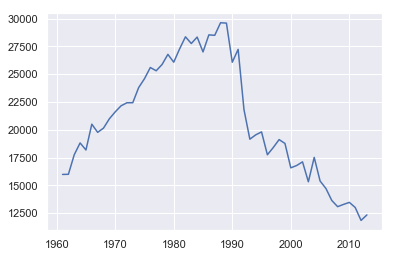

In [30]:
plt.plot(data_Bulgaria['Year'], data_Bulgaria['Volume'], )

In [31]:

from pandas import Series
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARIMAResults

In [32]:
model = ARIMA(data_Bulgaria.Volume, order=(0,1,3))
model_fit = model.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

                             ARIMA Model Results                              
Dep. Variable:               D.Volume   No. Observations:                   52
Model:                 ARIMA(0, 1, 3)   Log Likelihood                -447.458
Method:                       css-mle   S.D. of innovations           1314.144
Date:                Fri, 05 Jul 2019   AIC                            904.915
Time:                        14:15:11   BIC                            914.671
Sample:                             1   HQIC                           908.656
                                                                              
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const            -67.1538    269.675     -0.249      0.804    -595.707     461.399
ma.L1.D.Volume    -0.0774      0.142     -0.546      0.587      -0.355       0.200
ma.L2.D.Volume     0.2997      0.162

In [33]:
pred = model_fit.predict(start=len(data_Bulgaria.Volume), end=len(data_Bulgaria.Volume) + 3)

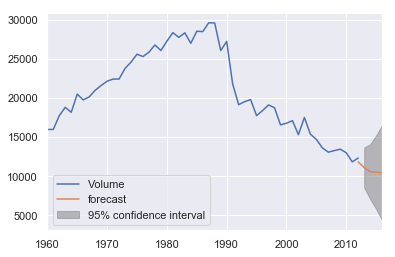

In [35]:
fig, ax = plt.subplots()
labels = ['1960', '1970', '1980', '1990', '2000', '2010']
ax = data_Bulgaria['Volume'].plot()
ax.set_xticklabels(labels)
fig = model_fit.plot_predict(start = 52, end= 56, dynamic=True, ax=ax , plot_insample=False)
plt.show()

In [71]:
pred

53   -774.753256
54   -364.036925
55     72.678725
56    -67.153756
dtype: float64

VIsualisations


In [36]:
df12 = df.loc[:, ~(df.columns).isin(['Area Abbreviation','Area Code', 'Item Code', 'Element Code', 'latitude', 'longitude'])]

In [37]:
df12.head()

,Area,Item,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,Wheat and products,Food,1000 tonnes,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,...,3249.0,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895
1,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,183.0,183.0,182.0,220.0,220.0,195.0,...,419.0,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422
2,Afghanistan,Barley and products,Feed,1000 tonnes,76.0,76.0,76.0,76.0,76.0,75.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360
3,Afghanistan,Barley and products,Food,1000 tonnes,237.0,237.0,237.0,238.0,238.0,237.0,...,185.0,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89
4,Afghanistan,Maize and products,Feed,1000 tonnes,210.0,210.0,214.0,216.0,216.0,216.0,...,120.0,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200


In [38]:
df12['Uni_int'] = df12['Unit'].str[:4]



c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [39]:
df12.head()

,Area,Item,Element,Unit,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Uni_int
0,Afghanistan,Wheat and products,Food,1000 tonnes,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,1000
1,Afghanistan,Rice (Milled Equivalent),Food,1000 tonnes,183.0,183.0,182.0,220.0,220.0,195.0,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,1000
2,Afghanistan,Barley and products,Feed,1000 tonnes,76.0,76.0,76.0,76.0,76.0,75.0,...,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360,1000
3,Afghanistan,Barley and products,Food,1000 tonnes,237.0,237.0,237.0,238.0,238.0,237.0,...,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89,1000
4,Afghanistan,Maize and products,Feed,1000 tonnes,210.0,210.0,214.0,216.0,216.0,216.0,...,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200,1000


In [40]:
df12 = df12.loc[:, ~(df12.columns).isin(['Unit', 'Unit_int'])]

In [41]:
df12.head()

,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Uni_int
0,Afghanistan,Wheat and products,Food,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,1000
1,Afghanistan,Rice (Milled Equivalent),Food,183.0,183.0,182.0,220.0,220.0,195.0,231.0,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,1000
2,Afghanistan,Barley and products,Feed,76.0,76.0,76.0,76.0,76.0,75.0,71.0,...,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360,1000
3,Afghanistan,Barley and products,Food,237.0,237.0,237.0,238.0,238.0,237.0,225.0,...,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89,1000
4,Afghanistan,Maize and products,Feed,210.0,210.0,214.0,216.0,216.0,216.0,235.0,...,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200,1000


In [42]:
sum_ff_bycnt = df.groupby('Area').sum()

In [43]:
sum_ff_bycnt.head()

,Area Code,Item Code,Element Code,latitude,longitude,Y1961,Y1962,Y1963,Y1964,Y1965,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
Area,,,,,,,,,,,,,,,,,,,,,
Afghanistan,166,224695,430576,2817.02,5619.93,9481.0,9414.0,9194.0,10170.0,10473.0,...,16542.0,17658.0,18317.0,19248.0,19381.0,20661.0,21030.0,21100.0,22706,23007
Albania,369,331693,641941,5061.45,2480.91,1706.0,1749.0,1767.0,1889.0,1884.0,...,6637.0,6719.0,6911.0,6744.0,7168.0,7316.0,7907.0,8114.0,8221,8271
Algeria,496,333506,645946,3475.72,205.84,7488.0,7235.0,6861.0,7255.0,7509.0,...,48619.0,49562.0,51067.0,49933.0,50916.0,57505.0,60071.0,65852.0,69365,72161
Angola,763,295092,566163,-1220.80,1947.83,4834.0,4775.0,5240.0,5286.0,5527.0,...,25541.0,26696.0,28247.0,29877.0,32053.0,36985.0,38400.0,40573.0,38064,48639
Antigua and Barbuda,936,315344,606541,1996.02,-7230.60,92.0,94.0,105.0,95.0,84.0,...,92.0,115.0,110.0,122.0,115.0,114.0,115.0,118.0,113,119


In [44]:
year_item_mean = sum_ff_bycnt.mean(axis=1)

In [45]:
year_item_mean.head()

Area
Afghanistan            23328.206034
Albania                21012.885517
Algeria                43349.009655
Angola                 27047.603966
Antigua and Barbuda    15897.110690
dtype: float64

In [46]:
ff_mean = df.groupby('Element').mean()
ff_med = df.groupby('Element').median()
ffmean_by_date = ff_mean.drop(['Area Code','Item Code','Element Code','latitude','longitude'],axis=1).T
ffmed_by_date = ff_med.drop(['Area Code','Item Code','Element Code','latitude','longitude'],axis=1).T

In [47]:
## re-index the years to date time
nidx = []
for i in ffmean_by_date.index:
    nidx.append(pd.to_datetime(i[1:]))
ffmean_by_date.index = nidx
ffmed_by_date.index = nidx

In [48]:
nidx

[Timestamp('1961-01-01 00:00:00'),
 Timestamp('1962-01-01 00:00:00'),
 Timestamp('1963-01-01 00:00:00'),
 Timestamp('1964-01-01 00:00:00'),
 Timestamp('1965-01-01 00:00:00'),
 Timestamp('1966-01-01 00:00:00'),
 Timestamp('1967-01-01 00:00:00'),
 Timestamp('1968-01-01 00:00:00'),
 Timestamp('1969-01-01 00:00:00'),
 Timestamp('1970-01-01 00:00:00'),
 Timestamp('1971-01-01 00:00:00'),
 Timestamp('1972-01-01 00:00:00'),
 Timestamp('1973-01-01 00:00:00'),
 Timestamp('1974-01-01 00:00:00'),
 Timestamp('1975-01-01 00:00:00'),
 Timestamp('1976-01-01 00:00:00'),
 Timestamp('1977-01-01 00:00:00'),
 Timestamp('1978-01-01 00:00:00'),
 Timestamp('1979-01-01 00:00:00'),
 Timestamp('1980-01-01 00:00:00'),
 Timestamp('1981-01-01 00:00:00'),
 Timestamp('1982-01-01 00:00:00'),
 Timestamp('1983-01-01 00:00:00'),
 Timestamp('1984-01-01 00:00:00'),
 Timestamp('1985-01-01 00:00:00'),
 Timestamp('1986-01-01 00:00:00'),
 Timestamp('1987-01-01 00:00:00'),
 Timestamp('1988-01-01 00:00:00'),
 Timestamp('1989-01-

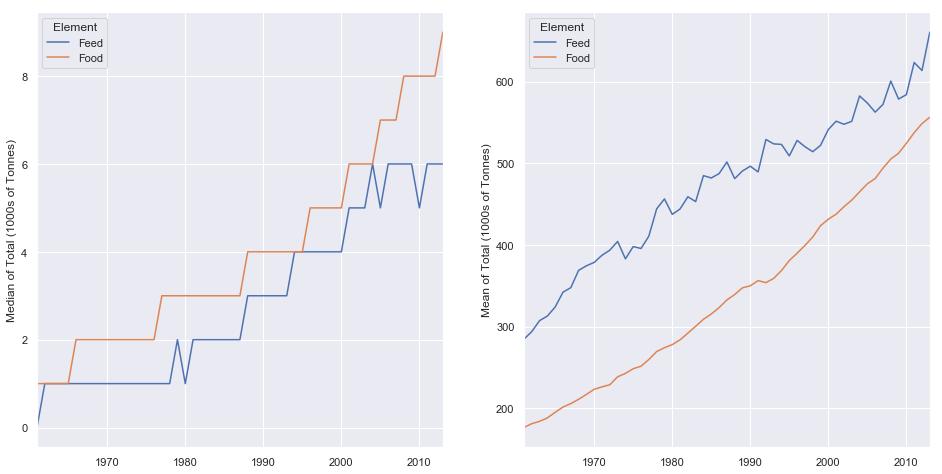

In [49]:
fig, ax=plt.subplots(1,2,figsize=(16,8))
ffmed_by_date.plot(ax=ax[0]);
ax[0].set_ylabel('Median of Total (1000s of Tonnes)');
ffmean_by_date.plot(ax=ax[1]);
ax[1].set_ylabel('Mean of Total (1000s of Tonnes)');

In [50]:
df12.head()

,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013,Uni_int
0,Afghanistan,Wheat and products,Food,1928.0,1904.0,1666.0,1950.0,2001.0,1808.0,2053.0,...,3486.0,3704.0,4164.0,4252.0,4538.0,4605.0,4711.0,4810,4895,1000
1,Afghanistan,Rice (Milled Equivalent),Food,183.0,183.0,182.0,220.0,220.0,195.0,231.0,...,445.0,546.0,455.0,490.0,415.0,442.0,476.0,425,422,1000
2,Afghanistan,Barley and products,Feed,76.0,76.0,76.0,76.0,76.0,75.0,71.0,...,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360,1000
3,Afghanistan,Barley and products,Food,237.0,237.0,237.0,238.0,238.0,237.0,225.0,...,43.0,44.0,48.0,62.0,55.0,60.0,72.0,78,89,1000
4,Afghanistan,Maize and products,Feed,210.0,210.0,214.0,216.0,216.0,216.0,235.0,...,208.0,233.0,249.0,247.0,195.0,178.0,191.0,200,200,1000


In [51]:
cnt = year_item_mean.sort_values(ascending=False).index[:5].values

In [52]:
print(cnt)

['China, mainland' 'United States of America' 'India' 'Brazil' 'Germany']


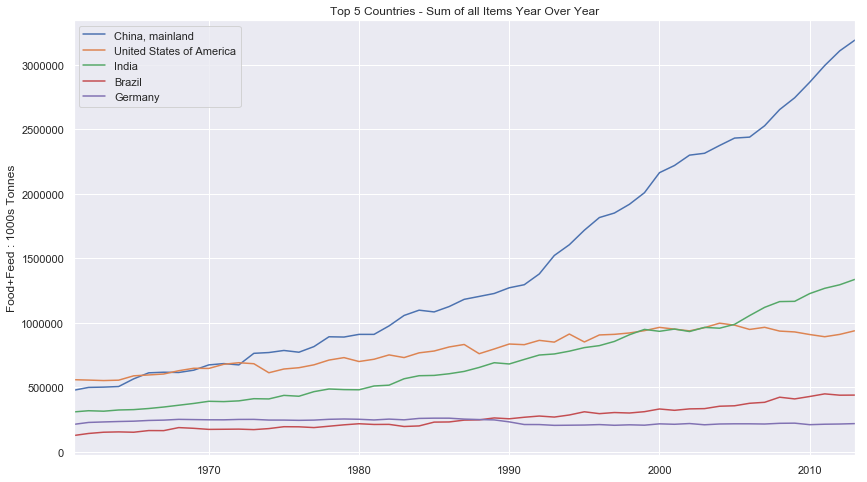

In [53]:
## get top 5 from index
cnt = year_item_mean.sort_values(ascending=False).index[:5].values
# print(cnt)
top5 = sum_ff_bycnt.T
top5 = top5.drop(['Area Code', 'Item Code', 'Element Code', 'latitude','longitude'])
top5.index = nidx
fig, ax=plt.subplots(1,1,figsize=(14,8))
for c in cnt:
    top5[c].plot(ax=ax, legend=True);
plt.title('Top 5 Countries - Sum of all Items Year Over Year');
plt.ylabel('Food+Feed : 1000s Tonnes');

In [54]:
mean_lat_lon_bycnt = df.groupby('Area').mean()[['latitude','longitude']]

Classification

In [73]:
Aggr_sum_no_att.head()

,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,Y2004,Y2005,Y2006,Y2007,Y2008,Y2009,Y2010,Y2011,Y2012,Y2013
0,Afghanistan,Alcoholic Beverages,Food,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,3.0,4.0,3.0,3.0,3.0,3.0,3.0,3,3
1,Afghanistan,Animal fats,Food,20.0,20.0,21.0,22.0,24.0,25.0,27.0,...,47.0,46.0,43.0,44.0,46.0,48.0,51.0,52.0,54,69
2,Afghanistan,Apples and products,Food,14.0,14.0,14.0,17.0,19.0,22.0,24.0,...,18.0,18.0,47.0,45.0,49.0,61.0,65.0,56.0,43,68
3,Afghanistan,Bananas,Food,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.0,1.0,11.0,8.0,12.0,38.0,21.0,28.0,48,82
4,Afghanistan,Barley and products,Feed,76.0,76.0,76.0,76.0,76.0,75.0,71.0,...,58.0,236.0,262.0,263.0,230.0,379.0,315.0,203.0,367,360


In [74]:
Aggr_sum_no_att1 = pd.get_dummies(Aggr_sum_no_att.Area, drop_first = True)

In [75]:
Aggr_sum_no_att1.head()

,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,...,United Republic of Tanzania,United States of America,Uruguay,Uzbekistan,Vanuatu,Venezuela (Bolivarian Republic of),Viet Nam,Yemen,Zambia,Zimbabwe
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [76]:
Aggr_sum_no_att2 = pd.get_dummies(Aggr_sum_no_att.Item, drop_first = True)

In [77]:
Aggr_sum_no_att2.head()

,Animal fats,Apples and products,"Aquatic Animals, Others",Aquatic Plants,"Aquatic Products, Other",Bananas,Barley and products,Beans,Beer,"Beverages, Alcoholic",...,"Sweeteners, Other",Tea (including mate),Tomatoes and products,Treenuts,Vegetable Oils,Vegetables,"Vegetables, Other",Wheat and products,Wine,Yams
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [78]:
frames = [Aggr_sum_no_att, Aggr_sum_no_att1, Aggr_sum_no_att2]

Aggr_sum_no_att_final = pd.concat(frames, sort = False, axis = 1)

In [79]:
Aggr_sum_no_att_final.head()

,Area,Item,Element,Y1961,Y1962,Y1963,Y1964,Y1965,Y1966,Y1967,...,"Sweeteners, Other",Tea (including mate),Tomatoes and products,Treenuts,Vegetable Oils,Vegetables,"Vegetables, Other",Wheat and products,Wine,Yams
0,Afghanistan,Alcoholic Beverages,Food,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
1,Afghanistan,Animal fats,Food,20.0,20.0,21.0,22.0,24.0,25.0,27.0,...,0,0,0,0,0,0,0,0,0,0
2,Afghanistan,Apples and products,Food,14.0,14.0,14.0,17.0,19.0,22.0,24.0,...,0,0,0,0,0,0,0,0,0,0
3,Afghanistan,Bananas,Food,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,Afghanistan,Barley and products,Feed,76.0,76.0,76.0,76.0,76.0,75.0,71.0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
Aggr_sum_no_att.shape

(21018, 56)

In [81]:
Aggr_sum_no_att1.shape

(21018, 173)

In [82]:
Aggr_sum_no_att2.shape

(21018, 114)

In [83]:
Y = (Aggr_sum_no_att['Element'] == 'Food')
Y = Y.astype(int)

In [84]:
X = Aggr_sum_no_att_final.drop(['Element','Area', 'Item'], axis=1)



In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [ ]:
#where_are_NaNs = pd.isnull(X)
#X[where_are_NaNs] = 0

In [ ]:
#where_are_NaNs = pd.isnull(Y)
#Y[where_are_NaNs] = 0

In [ ]:
#Y = np.array(X).reshape(-1,1)

In [ ]:
#Y = np.array(Y).reshape(-1,1)

In [ ]:
Y.shape

In [ ]:
X.shape

In [ ]:
Y

In [87]:
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(X_train, y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [88]:
bnb.score(X_train,y_train)

0.6041997081773774

In [89]:
bnb.score(X_test,y_test)

0.621313035204567

In [90]:
from sklearn.neighbors import KNeighborsClassifier
neighbors = KNeighborsClassifier(n_neighbors=1)

In [91]:
neighbors.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [92]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(neighbors, X_train, y_train, cv=5)

In [93]:
score

array([0.81800888, 0.83032033, 0.82550761, 0.81503807, 0.82614213])

In [94]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(neighbors, X_test, y_test, cv=5)

In [95]:
score

array([0.79087452, 0.78992395, 0.7963844 , 0.7952381 , 0.80380952])

In [96]:
from sklearn import linear_model

In [97]:
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train, y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=False, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [98]:
ridgeregr.score(X_train,y_train)

0.2585084630200797

In [99]:
ridgeregr.score(X_test,y_test)

0.17817420360452196

In [100]:
# Declare a logistic regression classifier.
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(C=1e9)
# Fit the model.
fit = lr.fit(X_train, y_train)

# Display.
print('Coefficients')
print(fit.coef_)
print(fit.intercept_)
pred_y_sklearn = lr.predict(X)

print('\n Accuracy')
print(pd.crosstab(pred_y_sklearn, Y))

print('\n Percentage accuracy')
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))

c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\kristine\appdata\local\programs\python\python37-32\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Coefficients
[[ 8.98943502e-04 -2.25463288e-04  1.67121407e-04 -6.62016715e-04
   2.14391765e-04  1.00531277e-03  1.12124302e-03 -1.37915353e-03
  -7.21540983e-04 -4.68677708e-04  1.01098245e-04  7.17498312e-04
  -1.13268093e-03  3.01038667e-04 -1.38841247e-03  2.64782087e-03
   1.01504664e-03 -2.11347124e-03 -2.03827476e-04 -7.29466505e-04
   1.33377502e-03  1.81735535e-04  1.47747379e-03 -2.26223203e-03
   6.26609320e-04 -6.18361617e-04 -1.95053762e-03  1.98926082e-03
   1.75763333e-04 -2.76659075e-04  3.45721072e-04  6.18067608e-04
  -6.31725213e-04  1.99673831e-04 -6.62996647e-04 -8.28016725e-04
  -1.10712373e-04  1.14115304e-03  1.20748660e-03  7.66522334e-04
  -9.83513621e-04 -8.78546475e-04  1.00773802e-03 -1.39880302e-03
  -6.10073371e-04  7.98328304e-04  1.70250278e-03 -2.48058352e-03
   2.24589864e-03  5.39220319e-04 -1.38999535e-03  1.97172894e-03
  -1.62005989e-03  7.60852739e-05  7.21581285e-05  7.44348160e-05
   8.80708581e-05  6.68741512e-05  5.35599111e-05  6.74964270e-